In [22]:
# check GPU availability
import tensorflow as tf
print('tf version {}'.format(tf.__version__))
print('Is GPU available {}'.format(tf.test.is_gpu_available()))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf version 1.11.0
Is GPU available True
Found GPU at: /device:GPU:0


In [124]:
# run one experiment from scratch
%load_ext autoreload
%autoreload 2
import os
from model import Model
from cfg import get_cfg
from utils import get_experiment_name
from utils import dotdict
tf.reset_default_graph()

experiments_folder = os.path.join(os.getcwd(), 'results')
experiment_name, experiment_folder = get_experiment_name(experiments_folder)

# load default config parameters
cfg_env, cfg_agent = get_cfg(experiment_folder, 'CartPole-v0', 'vpg')
#cfg_env, cfg_agent = get_cfg(experiment_folder, 'four_rooms_maze', 'vpg')
cfg = cfg_env
cfg.update(cfg_agent)
cfg = dotdict(cfg)

# modify default config parameters
cfg.n_batches = 1000
cfg.n_episodes = 1000
cfg.log_step = 100

# load and train model
model = Model(cfg)
model.train_model()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ep 100 st 2596 vpg e.ret.tr 22.95 e.ret.ts 53.00 ag.ls 5.44 bs.ls 163.02 
ep 200 st 4973 vpg e.ret.tr 21.75 e.ret.ts 54.00 ag.ls 4.23 bs.ls 106.49 
ep 300 st 7923 vpg e.ret.tr 35.45 e.ret.ts 15.00 ag.ls 5.66 bs.ls 265.04 
ep 400 st 12324 vpg e.ret.tr 61.10 e.ret.ts 51.00 ag.ls 6.85 bs.ls 574.04 
ep 500 st 21227 vpg e.ret.tr 121.30 e.ret.ts 127.00 ag.ls 8.53 bs.ls 1346.16 
ep 600 st 36612 vpg e.ret.tr 169.85 e.ret.ts 200.00 ag.ls 8.41 bs.ls 1634.20 
ep 700 st 54026 vpg e.ret.tr 171.80 e.ret.ts 200.00 ag.ls 7.02 bs.ls 1282.29 
ep 800 st 72962 vpg e.ret.tr 193.70 e.ret.ts 200.00 ag.ls 6.54 bs.ls 1281.70 
ep 900 st 90819 vpg e.ret.tr 192.10 e.ret.ts 174.00 ag.ls 5.78 bs.ls 1078.29 
ep 1000 st 109220 vpg e.ret.tr 183.75 e.ret.ts 196.00 ag.ls 4.93 bs.ls 897.54 


In [3]:
# simulate one episode in OpenAI gym
obs, ext_return, done = model.env.reset(), 0., False
n_steps, _return = 0, 0
while not done:
    action = model.action(obs)
    obs, r, done, _ = model.env.step(action)
    _return += r
    n_steps += 1
    model.env.render()
model.env.close()
print(_return, n_steps)

200.0 200


0.0 20.0 5


<IPython.core.display.Javascript object>


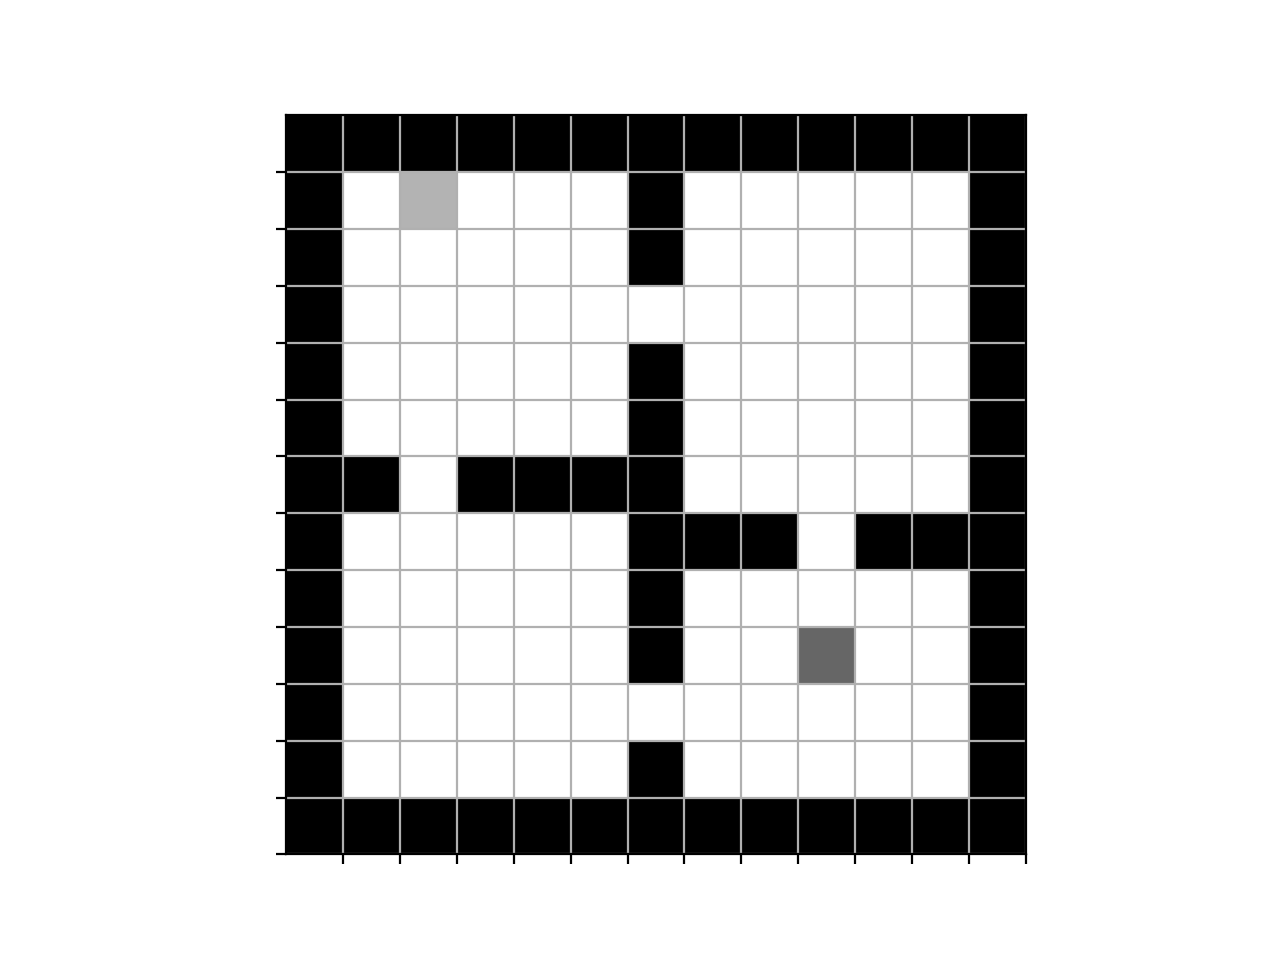

In [9]:
# simulate one maze episode 
import matplotlib 
%matplotlib nbagg
ext_return, n_steps, obs_list = model.simulate()
print(ext_return, n_steps, len(model.env.visited))
model.env.animate(obs_list)